<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: J. Vicente Onetto
- Nombre de alumno 2: Renzo Zanca

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/RenzoZanca/MDS7202/tree/lab10/lab10)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

In [6]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [7]:
df = pd.read_csv('energia_homero.csv')
df['date'] = pd.to_datetime(df['date'])

fig = px.scatter(df, x = df.date, y=df.Energy_kWh, title='Consumo de energía')
fig.update_traces(marker=dict(size=3.5))
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go

In [9]:
# 0. dividir el dataset en train y test

train_df = df[df['date'] <= '2020-02-29']
test_df = df[df['date'] >= '2020-03-01']

X_train = train_df[['date']]
y_train = train_df['Energy_kWh']

X_test = test_df[['date']]
y_test = test_df['Energy_kWh']

X_all = df[['date']]
y_all = df['Energy_kWh']

# 1. Pipeline:
def date_to_ordinal(X):
    return X.astype('int64').to_numpy().reshape(-1, 1) // 10**9

Pipeline_trend = Pipeline([
    ('date_to_ordinal', FunctionTransformer(date_to_ordinal, validate=False)),
    ('linear_model', LinearRegression())
])

# 2. Entrenamiento y predicción
Pipeline_trend.fit(X_train, y_train)
y_pred_all = Pipeline_trend.predict(X_all)

# MAE
mae_train = mean_absolute_error(y_train, Pipeline_trend.predict(X_train))
mae_test = mean_absolute_error(test_df['Energy_kWh'], Pipeline_trend.predict(test_df['date']))
print(f'MAE en entrenamiento: {mae_train:.2f} kWh')
print(f'MAE en test: {mae_test:.2f} kWh')

# Graficar predicciones

split_date = pd.to_datetime('2020-03-01')
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=y_all, mode='markers', name='Real', marker=dict(size=3)))
fig.add_trace(go.Scatter(x=df['date'], y=y_pred_all, mode='lines', name='Predicción (Tendencia)'))
fig.add_vline(x=split_date, line_dash="dash", line_color="black")
fig.update_layout(title='Predicción de Tendencia', xaxis_title='Fecha', yaxis_title='Energía (kWh)')

MAE en entrenamiento: 10.57 kWh
MAE en test: 8.66 kWh


In [10]:
# 3. Graficar error
error = y_all - y_pred_all
fig_error = px.line(x=df['date'], y=error, title='Error de Predicción (Real - Predicho)', labels={'x': 'Fecha', 'y': 'Error'})
fig_error.update_traces(line=dict(color='red'))
fig_error.show()

Notamos un claro comportamiento estacional, en donde en los meses de Julio aumenta el error y disminuye en los meses de Enero

In [11]:
# 4. Pipeline con Estacionalidad

from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n=4, p=365):
        self.n = n
        self.p = p
        self.init_date = None

    def fit(self, X, y=None):
        # Guardar la fecha inicial para calcular la tendencia
        self.init_date = X['date'].iloc[0]
        return self

    def transform(self, X):
        X = X[['date']].copy()
        assert self.init_date is not None, "You must call fit() first"

        # Tendencia: días desde la fecha inicial
        X['trend'] = (X['date'] - self.init_date).dt.days

        # Términos de Fourier para modelar estacionalidad
        for k in range(1, self.n + 1):
            X[f'sin_{k}'] = np.sin(2 * np.pi * k * X['trend'] / self.p)
            X[f'cos_{k}'] = np.cos(2 * np.pi * k * X['trend'] / self.p)

        return X.drop(columns='date')


P = 365.25  # Periodo anual
n = 3       # Número de términos de Fourier

Pipeline_seasonal = Pipeline([
    ('fourier', TimeTransformer(n=n, p=P)),
    ('reg', LinearRegression())
])

# 5. Entrenamiento y predicción
Pipeline_seasonal.fit(X_train, y_train)
y_pred_train = Pipeline_seasonal.predict(X_train)
y_pred_test = Pipeline_seasonal.predict(X_test)
y_pred_all = Pipeline_seasonal.predict(X_all)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'MAE en entrenamiento: {mae_train:.2f} kWh')
print(f'MAE en test: {mae_test:.2f} kWh')

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=y_all, mode='markers', name='Real', marker=dict(size=3)))
fig.add_trace(go.Scatter(x=df['date'], y=y_pred_all, mode='lines', name='Predicción Estacional'))
fig.add_vline(x=split_date, line_dash="dash", line_color="black")
fig.update_layout(title='Predicción con Tendencia + Estacionalidad',
                  xaxis_title='Fecha',
                  yaxis_title='Energía (kWh)')
fig.show()

MAE en entrenamiento: 5.37 kWh
MAE en test: 4.57 kWh


In [12]:
error = y_all - y_pred_all
fig_error = px.line(x=df['date'], y=error, title='Error (Real - Predicho)', labels={'x': 'Fecha', 'y': 'Error'})
fig_error.update_traces(line=dict(color='red'))
fig_error.show()

Notamos que el error disminuyó y que el error se acerca más a una serie estacionaria. Sin embargo, la desviación estandar todavia varia con el tiempo.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [13]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

d:\Universidad\MDS7202\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



**Respuesta:**

20:17:54 - cmdstanpy - INFO - Chain [1] start processing
20:17:56 - cmdstanpy - INFO - Chain [1] done processing


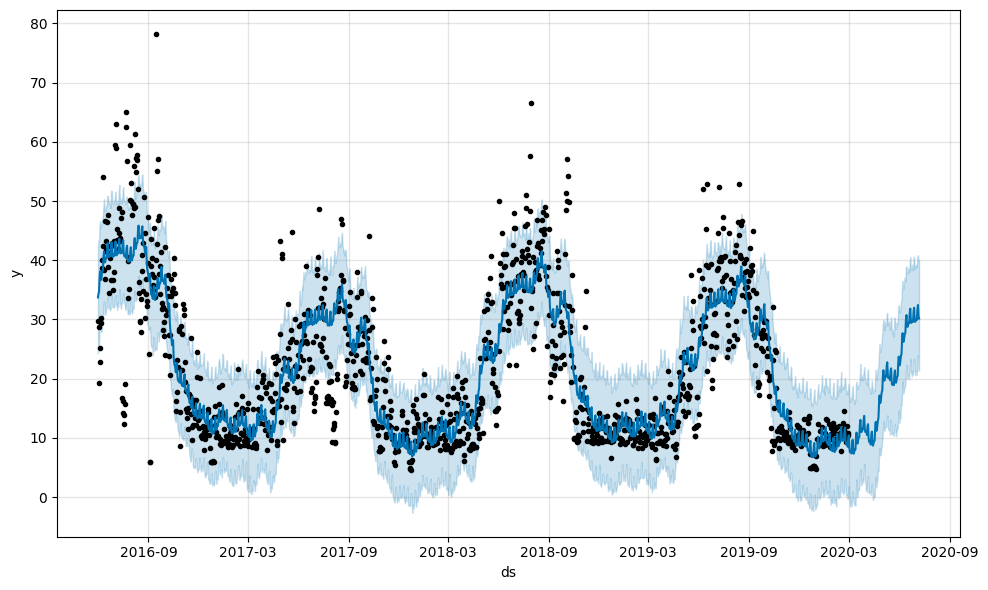

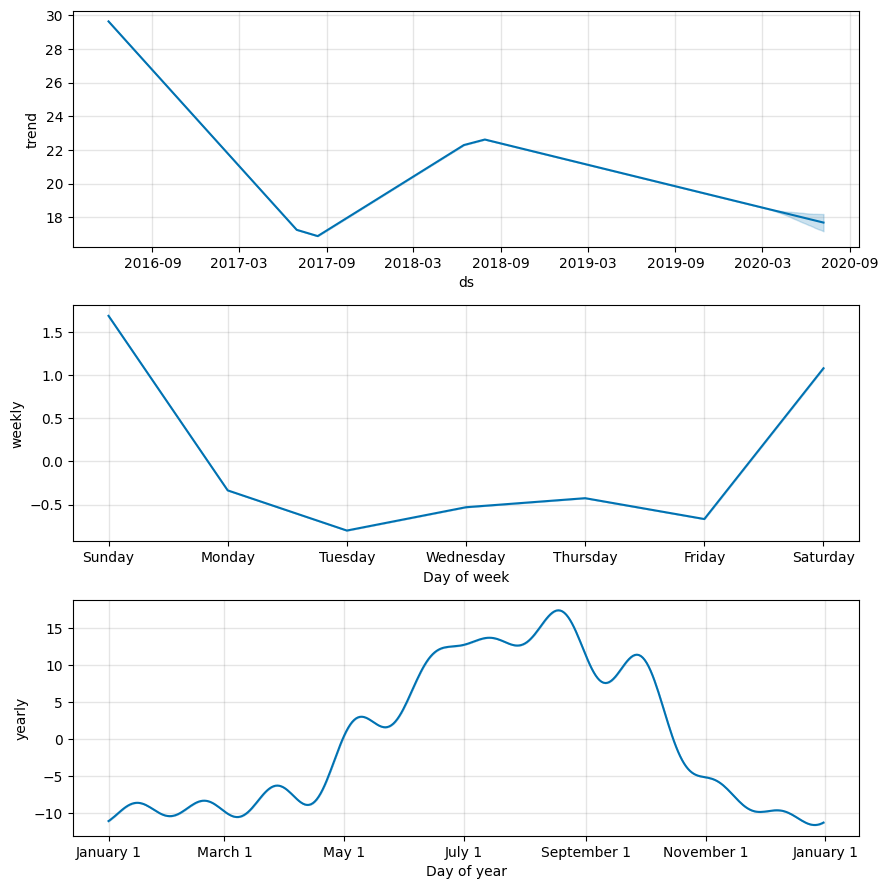

In [14]:
# 1. Preparar datos para Prophet
train_prophet = train_df.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_prophet = test_df.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# 2. Entrenar modelo Prophet
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(train_prophet)

# predecir:
future = pd.concat([train_prophet[['ds']], test_prophet[['ds']]], axis=0).reset_index(drop=True)
forecast = model.predict(future)

# 3. Graficar predicciones
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [15]:
# 4. MAE:
y_true_train = train_prophet['y'].values
y_pred_train = forecast.loc[:len(train_prophet)-1, 'yhat'].values

y_true_test = test_prophet['y'].values
y_pred_test = forecast.loc[len(train_prophet):, 'yhat'].values

mae_train_prophet = mean_absolute_error(y_true_train, y_pred_train)
mae_test_prophet = mean_absolute_error(y_true_test, y_pred_test)

print(f'MAE Train: {mae_train_prophet:.2f} kWh')
print(f'MAE Test: {mae_test_prophet:.2f} kWh')

MAE Train: 4.82 kWh
MAE Test: 4.93 kWh


In [16]:
# 5. Graficar errores:
df_all = pd.concat([train_prophet, test_prophet], axis=0).reset_index(drop=True)
df_all['yhat'] = forecast['yhat']
df_all['error'] = df_all['y'] - df_all['yhat']

fig_error = px.line(df_all, x='ds', y='error', title='Error de Predicción Prophet (Real - Predicho)', labels={'ds': 'Fecha', 'error': 'Error'})
fig_error.update_traces(line_color='purple')
fig_error.show()

Obtenemos un comportamiento de errores muy similar al del componentes de fourier. En donde se aprecia una serie más estacionaria, con leves cambios en la desviación de los errores.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

20:18:10 - cmdstanpy - INFO - Chain [1] start processing
20:18:10 - cmdstanpy - INFO - Chain [1] done processing


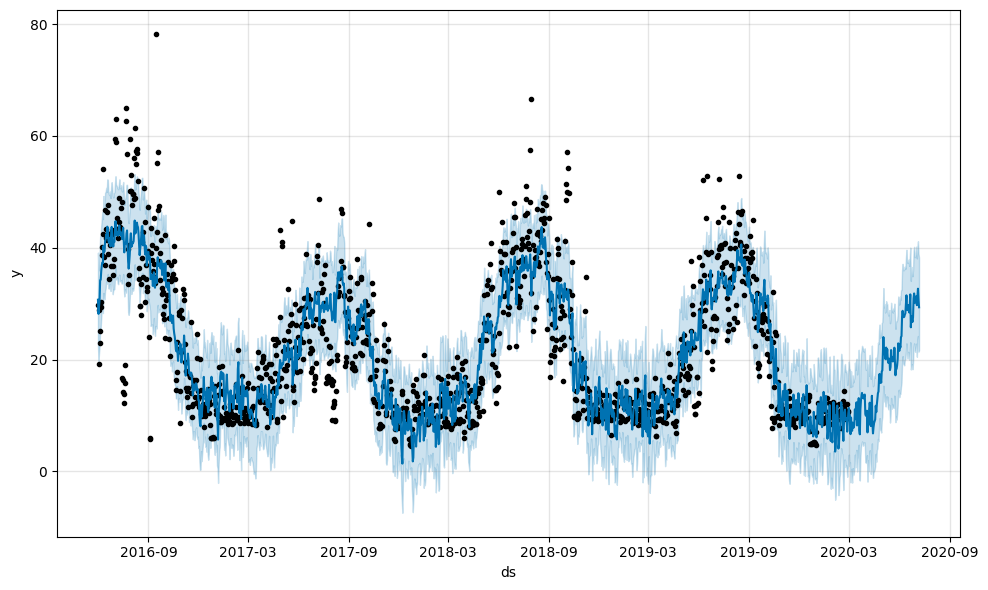

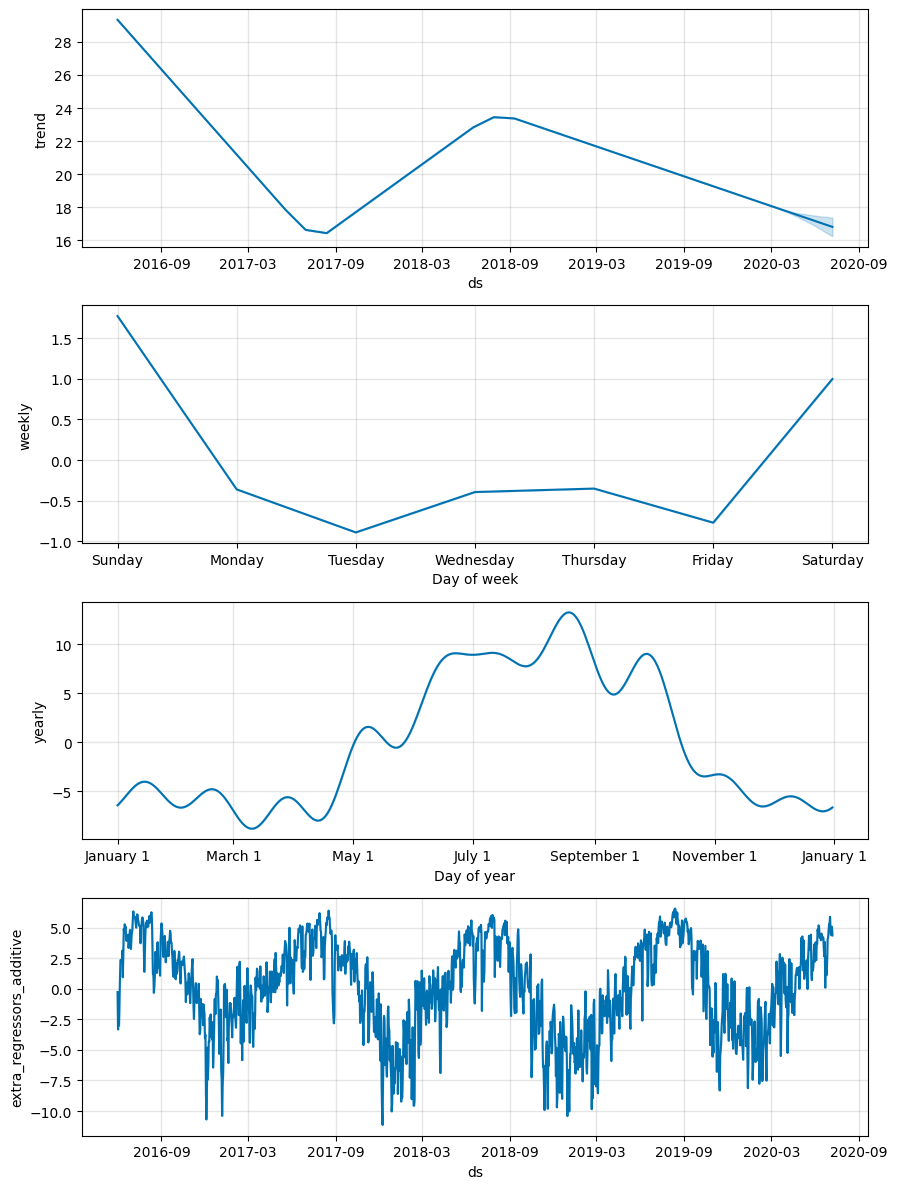

In [17]:
# 0. Cargar datos climáticos
clima_df = pd.read_csv('datos_frink.csv', parse_dates=['date'])

train_reg = train_df.merge(clima_df, on='date')
test_reg = test_df.merge(clima_df, on='date')

train_prophet = train_reg.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_prophet = test_reg.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# 1. Crear modelo Prophet con regresores
regresores = ['Temp_max', 'Temp_min', 'Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']

model_reg = Prophet(yearly_seasonality=True)

for reg in regresores:
    model_reg.add_regressor(reg)

model_reg.fit(train_prophet[['ds', 'y'] + regresores])

# 2. Predecir con regresores

future_reg = pd.concat([train_prophet, test_prophet], axis=0).reset_index(drop=True)
forecast_reg = model_reg.predict(future_reg[['ds'] + regresores])

# Gráficos
fig1 = model_reg.plot(forecast_reg)
fig2 = model_reg.plot_components(forecast_reg)

In [18]:
# 3. MAE con regresores
y_train_true = train_prophet['y'].values
y_train_pred = forecast_reg.loc[:len(train_prophet)-1, 'yhat'].values

y_test_true = test_prophet['y'].values
y_test_pred = forecast_reg.loc[len(train_prophet):, 'yhat'].values

mae_train = mean_absolute_error(y_train_true, y_train_pred)
mae_test = mean_absolute_error(y_test_true, y_test_pred)

print(f'MAE Train (con regresores): {mae_train:.2f} kWh')
print(f'MAE Test (con regresores): {mae_test:.2f} kWh')

# 4. Graficar errores con regresores
df_all_reg = pd.concat([train_prophet, test_prophet], axis=0).reset_index(drop=True)
df_all_reg['yhat'] = forecast_reg['yhat']
df_all_reg['error'] = df_all_reg['y'] - df_all_reg['yhat']

# Gráfico del error
fig_error = px.line(df_all_reg, x='ds', y='error', title='Error de Predicción con Regresores', labels={'ds': 'Fecha', 'error': 'Error'})
fig_error.update_traces(line_color='orange')
fig_error.show()

MAE Train (con regresores): 4.70 kWh
MAE Test (con regresores): 4.51 kWh


Notamos que el MAE en ambos conjuntos disminuyó, en particular se redujo en 0.4 aproximadamente en el conjunto de test. Con esto podemos concluir que el agregar regresores ayudó a predecir la cantidad de energía consumida. Por otro lado, el gráfico de errores sigue teniendo el mismo comportamiento, observando una serie estacionaria con leves variaciones en la desviación.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

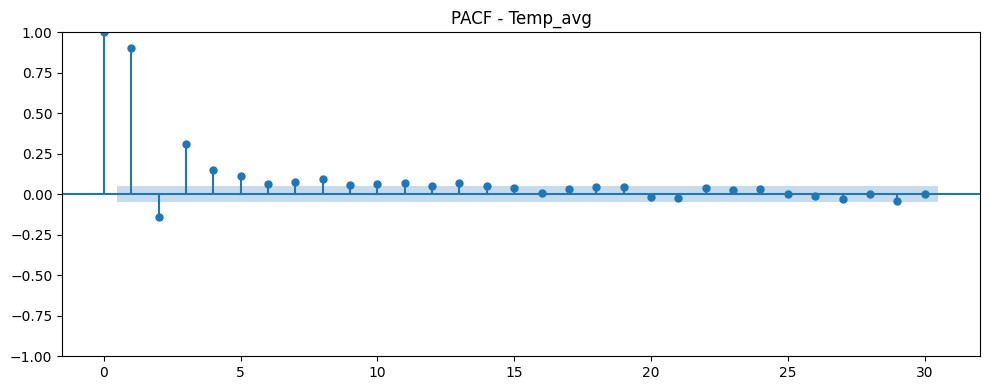

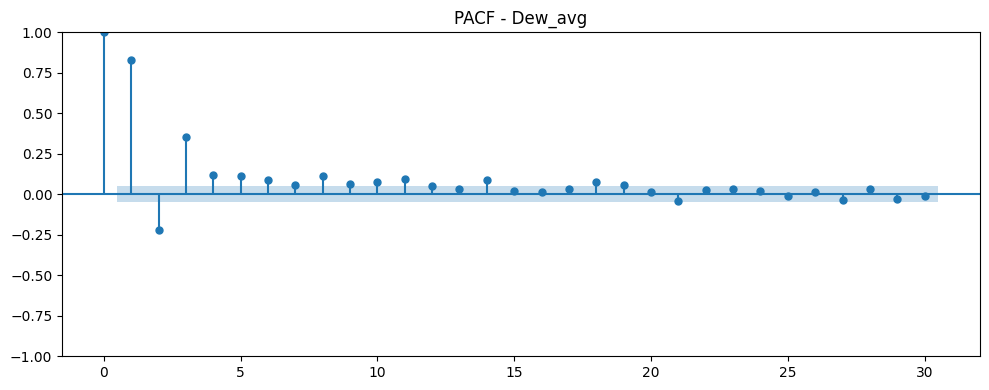

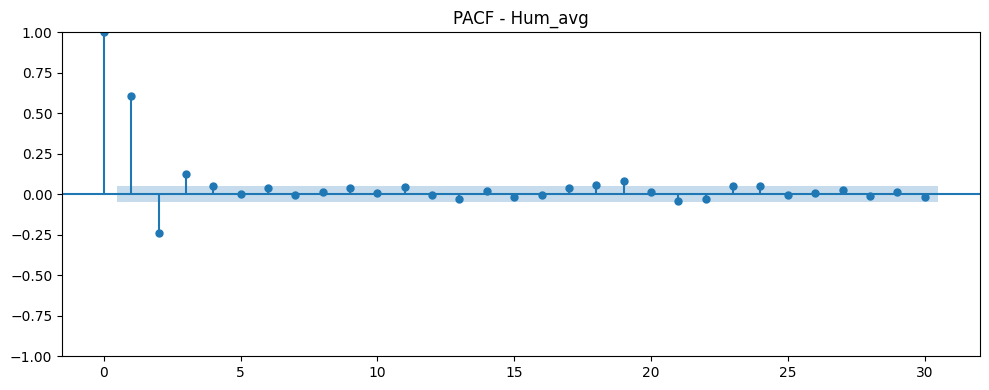

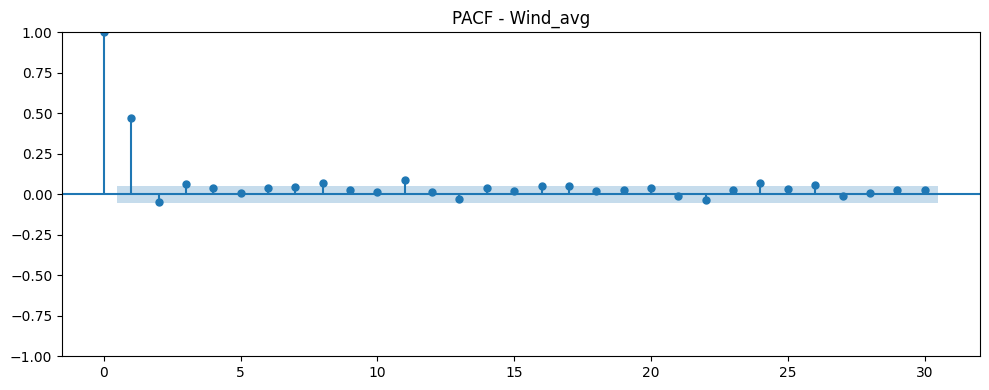

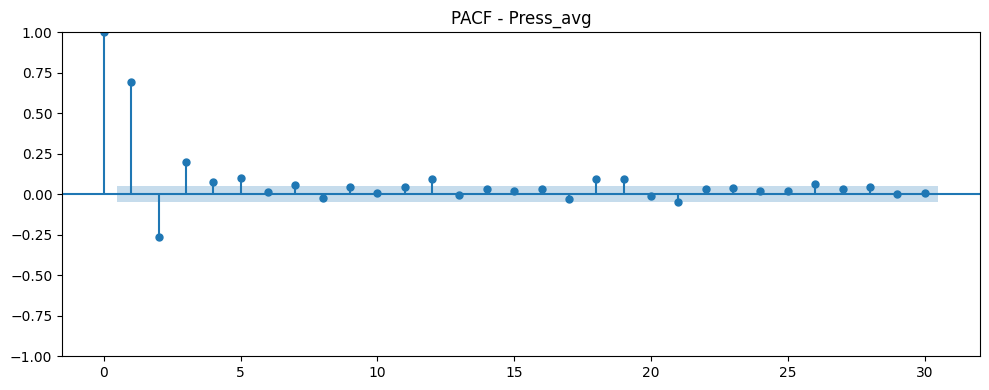

In [24]:
# 1. PACF de las variables exógenas
from statsmodels.graphics.tsaplots import plot_pacf

vars_avg = ['Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']

for var in vars_avg:
    fig, ax = plt.subplots(figsize=(10, 4))
    plot_pacf(clima_df[var], lags=30, ax=ax, method='ywm')
    plt.title(f'PACF - {var}')
    plt.tight_layout()
    plt.show()

20:27:17 - cmdstanpy - INFO - Chain [1] start processing
20:27:18 - cmdstanpy - INFO - Chain [1] done processing


MAE Train (con regresores + lags): 4.66 kWh
MAE Test (con regresores + lags): 4.49 kWh


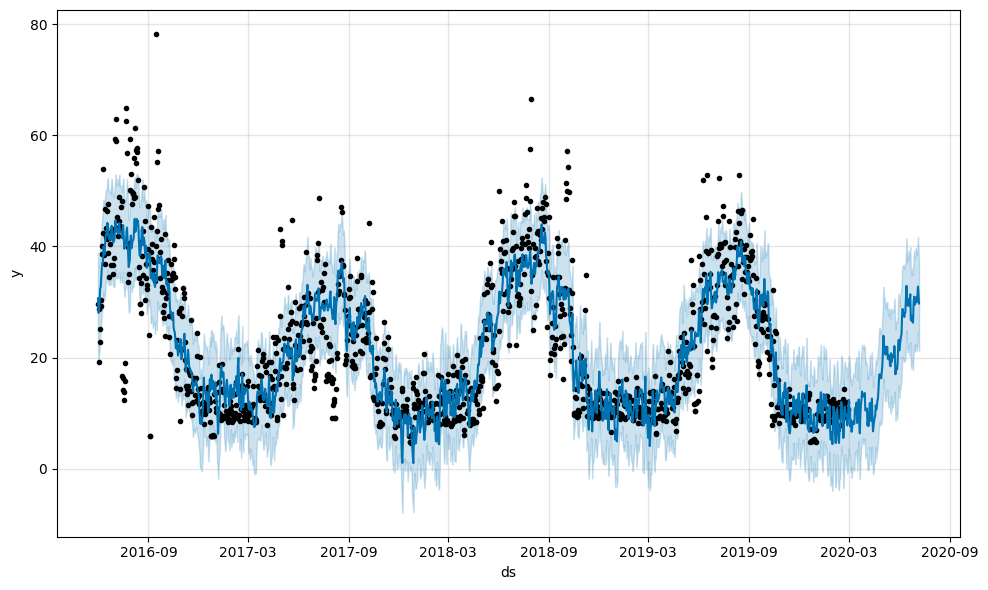

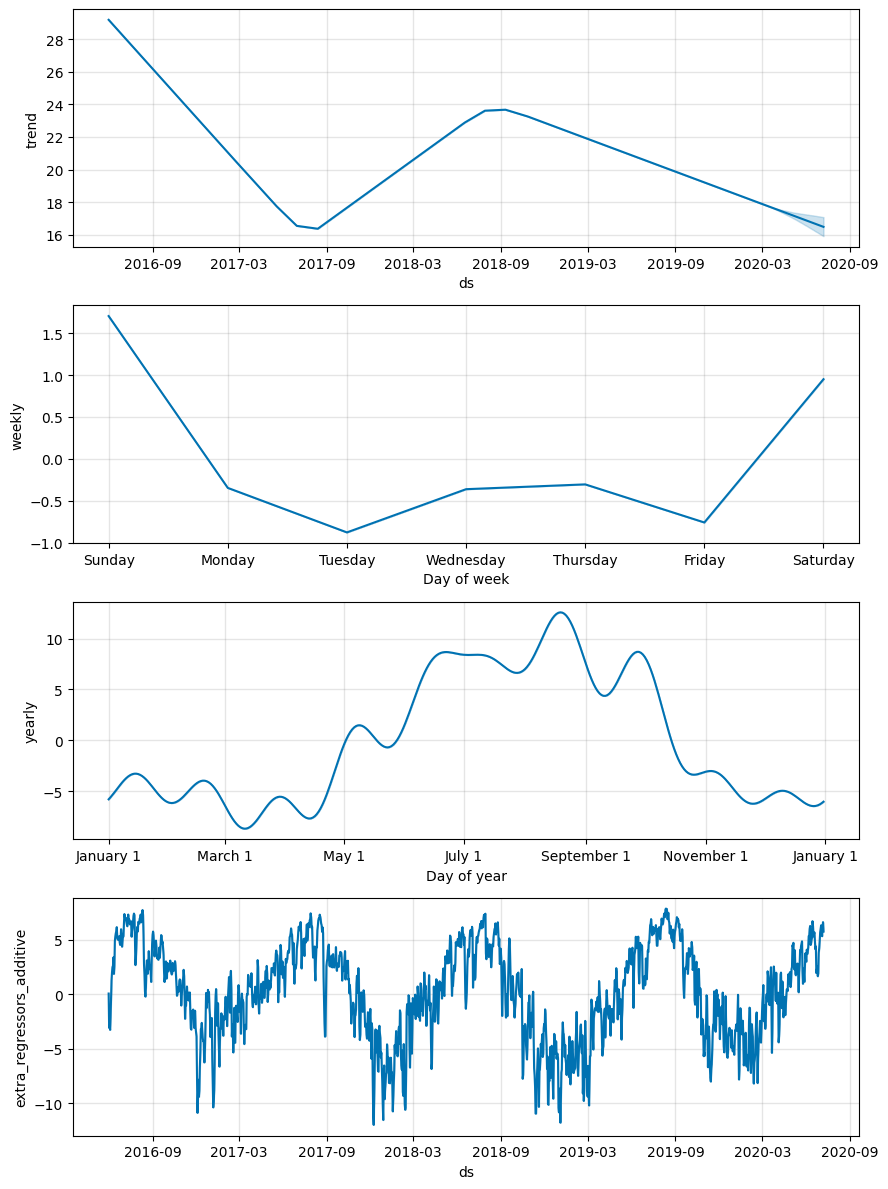

In [27]:
# Por inspección visual asignamos los siguientes lags:
lags_dict = {
    'Temp_avg': 4,
    'Dew_avg': 4,
    'Hum_avg': 3,
    'Wind_avg': 2,
    'Press_avg': 4
}

# 2. Aplicar lags
for var, n_lags in lags_dict.items():
    for lag in range(1, n_lags + 1):
        clima_df[f'{var}_lag{lag}'] = clima_df[var].shift(lag)

# 3. Imputar valores nulos con la media
clima_df.fillna(clima_df.mean(numeric_only=True), inplace=True)

# Volver a unir con train y test
train_reg_lag = train_df.merge(clima_df, on='date')
test_reg_lag = test_df.merge(clima_df, on='date')

train_prophet_lag = train_reg_lag.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_prophet_lag = test_reg_lag.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# 4. Crear y entrenar modelo Prophet con regresores y lags
regresores_lags = regresores + [f'{var}_lag{l}' for var, n in lags_dict.items() for l in range(1, n + 1)]

model_lag = Prophet(yearly_seasonality=True)
for reg in regresores_lags:
    model_lag.add_regressor(reg)

model_lag.fit(train_prophet_lag[['ds', 'y'] + regresores_lags])

# 5. Predicciones y gráficos
future_lag = pd.concat([train_prophet_lag, test_prophet_lag], axis=0).reset_index(drop=True)
forecast_lag = model_lag.predict(future_lag[['ds'] + regresores_lags])

fig3 = model_lag.plot(forecast_lag)
fig4 = model_lag.plot_components(forecast_lag)

# 6. Calcular MAE
y_train_pred_lag = forecast_lag.loc[:len(train_prophet_lag)-1, 'yhat'].values
y_test_pred_lag = forecast_lag.loc[len(train_prophet_lag):, 'yhat'].values

mae_train_lag = mean_absolute_error(train_prophet_lag['y'], y_train_pred_lag)
mae_test_lag = mean_absolute_error(test_prophet_lag['y'], y_test_pred_lag)

print(f'MAE Train (con regresores + lags): {mae_train_lag:.2f} kWh')
print(f'MAE Test (con regresores + lags): {mae_test_lag:.2f} kWh')

# 7. Gráfico del error
df_all_lag = pd.concat([train_prophet_lag, test_prophet_lag], axis=0).reset_index(drop=True)
df_all_lag['yhat'] = forecast_lag['yhat']
df_all_lag['error'] = df_all_lag['y'] - df_all_lag['yhat']

fig_error_lag = px.line(df_all_lag, x='ds', y='error', title='Error de Predicción con Lags', labels={'ds': 'Fecha', 'error': 'Error'})
fig_error_lag.update_traces(line_color='green')
fig_error_lag.show()

Nuevamente, obtenmos una serie estacionaria con leves desviaciones en los errores. Analizando el MAE, notamos que el error disminuye para el conjunto de train, pero solo en un 0.02 para el conjunto de testeo que es más relevante. Concluimos que al aplicar los lags se obtiene una leve mejora al modelo.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [29]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [31]:
# 1. Definir grilla de hiperparámetros
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.7, 0.8, 0.9]
}

# Optimizar
tuning_results, best_params = optimize_prophet(train_prophet_lag[['ds', 'y'] + regresores_lags],
                                                test_prophet_lag[['ds', 'y'] + regresores_lags],
                                                regresores_lags,
                                                param_grid)

print("Mejores hiperparámetros:")
print(best_params)


Tuning Prophet parameters: 100%|██████████| 72/72 [01:29<00:00,  1.25s/it]

Mejores hiperparámetros:
{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'changepoint_range': 0.7}


MAE Train (optimizados): 5.17 kWh
MAE Test (optimizados): 3.96 kWh


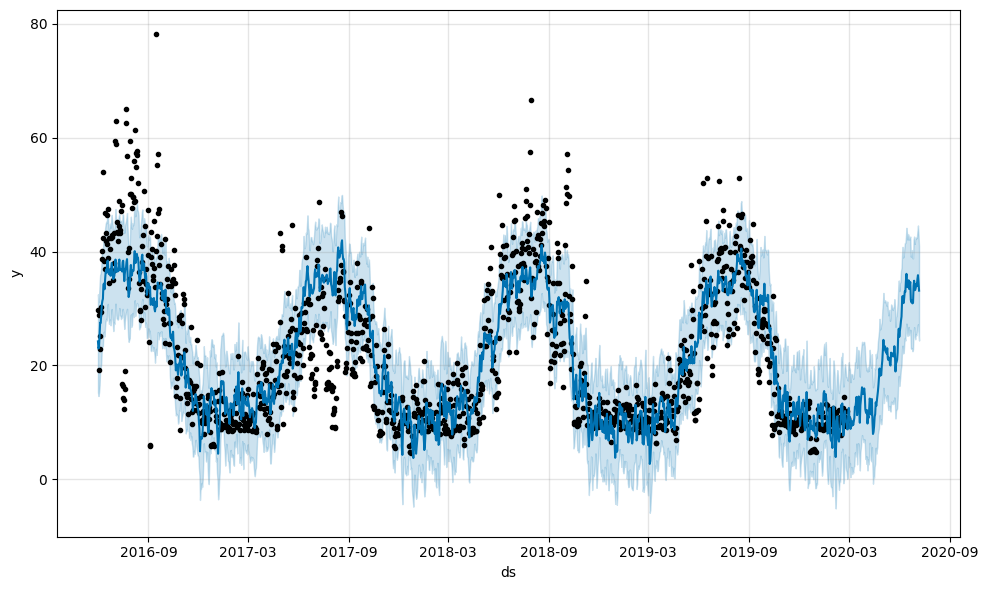

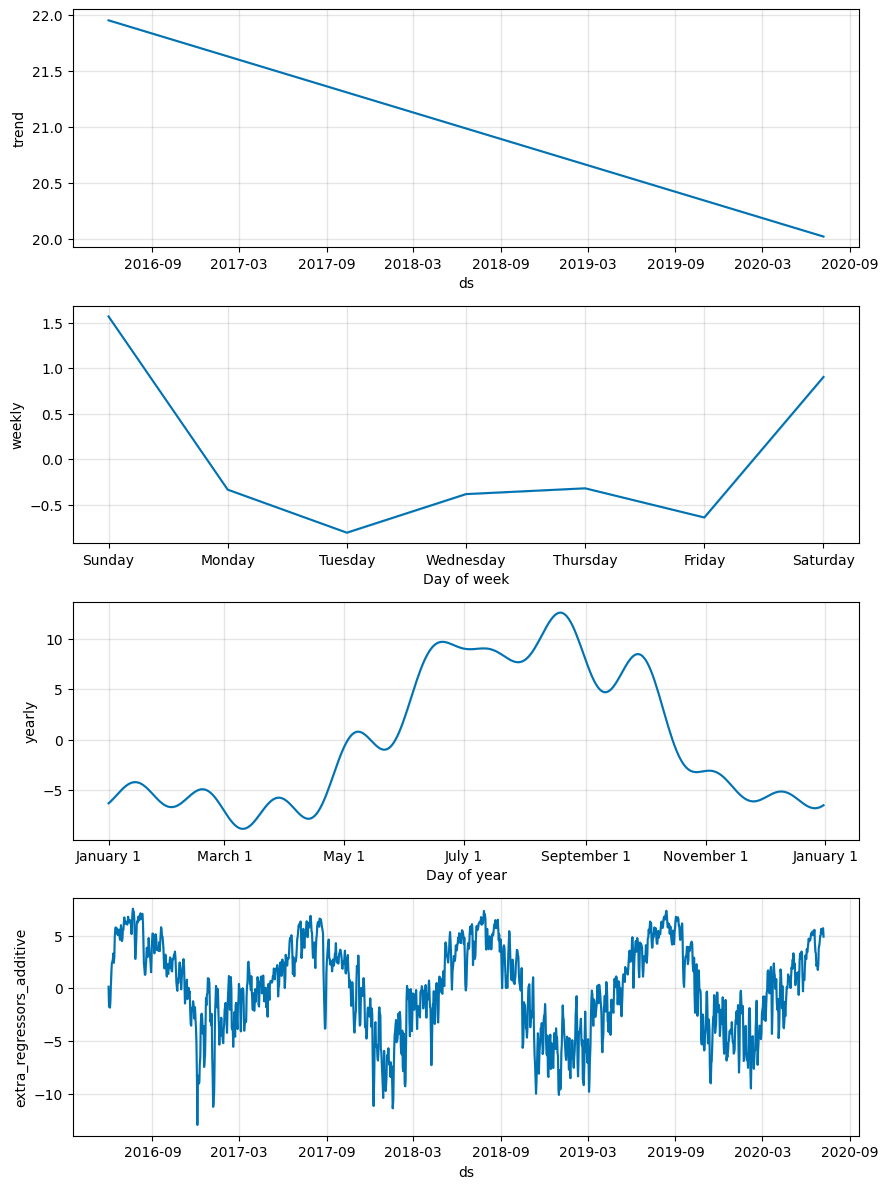

In [34]:
# 2. Crear modelo con mejores hiperparámetros
model_best = Prophet(**best_params)

for reg in regresores_lags:
    model_best.add_regressor(reg)

model_best.fit(train_prophet_lag[['ds', 'y'] + regresores_lags])

# 3. Predicciones y gráficos
future_best = pd.concat([train_prophet_lag, test_prophet_lag], axis=0).reset_index(drop=True)
forecast_best = model_best.predict(future_best[['ds'] + regresores_lags])

fig_best_pred = model_best.plot(forecast_best)
fig_best_comp = model_best.plot_components(forecast_best)

# 4. Calcular MAE
y_train_pred_best = forecast_best.loc[:len(train_prophet_lag)-1, 'yhat'].values
y_test_pred_best = forecast_best.loc[len(train_prophet_lag):, 'yhat'].values

mae_train_best = mean_absolute_error(train_prophet_lag['y'], y_train_pred_best)
mae_test_best = mean_absolute_error(test_prophet_lag['y'], y_test_pred_best)

print(f'MAE Train (optimizados): {mae_train_best:.2f} kWh')
print(f'MAE Test (optimizados): {mae_test_best:.2f} kWh')

# 5. Graficar errores
df_all_best = pd.concat([train_prophet_lag, test_prophet_lag], axis=0).reset_index(drop=True)
df_all_best['yhat'] = forecast_best['yhat']
df_all_best['error'] = df_all_best['y'] - df_all_best['yhat']

fig_error_best = px.line(df_all_best, x='ds', y='error',
                         title='Error de Predicción (Modelo Optimizado)',
                         labels={'ds': 'Fecha', 'error': 'Error'})
fig_error_best.add_vline(x=split_date, line_dash="dash", line_color="black")
fig_error_best.update_traces(line_color='blue')
fig_error_best.show()

Después de optimizar los hiperparámetros, notamos que el error (MAE) en el conjunto de entrenamiento aumentó un poco. Esto puede parecer negativo a primera vista, pero en realidad indica que el modelo dejó de ajustarse tanto a los datos pasados, lo que ayuda a evitar el sobreajuste.

Lo más positivo es que el MAE en el conjunto de prueba bajó considerablemente, llegando a un valor menor a 4 kWh. Esto significa que el modelo mejoró su capacidad para predecir datos nuevos, lo cual es justamente lo que buscamos. De igual manera que antes, se observa que los errores son estacionarios y que únicamente hay variaciones en la desviación de los errores.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [3]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.5 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl (65 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy; print(numpy.__version__)
import surprise; print(surprise.__version__)


1.26.4
1.1.4


In [5]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise.model_selection import train_test_split

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [6]:
import pandas as pd

# 1) Carga de los datos
df = pd.read_csv('cervezas.csv')

# 2) Vista rápida de las primeras filas
print(df.head())

# 3) Estructura y tipos
print(df.info())

# 4) Forma del DataFrame
print("Shape:", df.shape)

# 5) Conteo de valores nulos
print("Valores nulos por columna:")
print(df.isna().sum())

# 6) Conteo de categorías únicas
print("Usuarios únicos   :", df['userId'].nunique())
print("Cervezas únicas   :", df['beerId'].nunique())
print("Nombres únicos    :", df['beerName'].nunique())
print("Estilos únicos    :", df['beerStyle'].nunique())

# 7) Estadística descriptiva de las calificaciones
print(df['rating'].describe())


   userId  beerId  rating                            beerName  \
0     144     995     3.0                            Mai Bock   
1      63   58695     4.0  Hop In The Dark Cascadian Dark Ale   
2     147    4083     5.0                 Stone Ruination IPA   
3    4261   40310     3.0                     Noël Des Géants   
4     140    1904     5.0       Sierra Nevada Celebration Ale   

                        beerStyle  
0           Maibock / Helles Bock  
1              American Black Ale  
2  American Double / Imperial IPA  
3            Herbed / Spiced Beer  
4                    American IPA  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295059 entries, 0 to 295058
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     295059 non-null  int64  
 1   beerId     295059 non-null  int64  
 2   rating     295059 non-null  float64
 3   beerName   295059 non-null  object 
 4   beerStyle  295059 non-null  obje

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [7]:
# 1) ¿Usuarios, productos y total de ratings?
n_usuarios   = df['userId'].nunique()
n_productos  = df['beerId'].nunique()
n_ratings    = len(df)
n_missing    = df['rating'].isna().sum()
mean_rating  = df['rating'].mean()

print(f"Usuarios únicos         : {n_usuarios}")
print(f"Cervezas únicas         : {n_productos}")
print(f"Total de calificaciones  : {n_ratings}")
print(f"Calificaciones faltantes : {n_missing}")
print(f"Media global de ratings : {mean_rating:.2f}\n")

# 3) Media de calificaciones por cerveza
mean_by_beer = (
    df.groupby('beerId')['rating']
      .agg(['mean', 'count'])
      .rename(columns={'mean':'rating_mean','count':'n_ratings'})
      .sort_values('rating_mean', ascending=False)
)
print("Top 5 cervezas por media de rating:")
print(mean_by_beer.head(5))

# 4) Matriz usuario × producto
ratings_matrix = df.pivot_table(
    index='userId',
    columns='beerId',
    values='rating',
    aggfunc='mean'
)
print("\nMatriz usuario×producto tiene forma:", ratings_matrix.shape)





Usuarios únicos         : 706
Cervezas únicas         : 3747
Total de calificaciones  : 295059
Calificaciones faltantes : 0
Media global de ratings : 3.86

Top 5 cervezas por media de rating:
        rating_mean  n_ratings
beerId                        
56082      4.669492         59
1545       4.666129        310
36316      4.654762         42
1062       4.639706         68
16814      4.639344        122

Matriz usuario×producto tiene forma: (706, 3747)


## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [8]:
# 1. DataFrame de características únicas de cervezas (sin duplicados)
df = pd.read_csv('cervezas.csv')  
df_beers = (
    df[['beerId','beerName','beerStyle']]
    .drop_duplicates(subset=['beerId'])
    .set_index('beerId')
)

# 2. Bag of Words sobre 'beerStyle'
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=10         # ignora términos que aparezcan en menos de 10 estilos
)
X_style = vectorizer.fit_transform(df_beers['beerStyle'])
style_df = pd.DataFrame(
    X_style.toarray(),
    index=df_beers.index,
    columns=vectorizer.get_feature_names_out()
)

# 3. Función para extraer top-5 similares por similitud coseno
cos_sim = cosine_similarity(style_df)
cos_df  = pd.DataFrame(cos_sim,
                       index=style_df.index,
                       columns=style_df.index)


def top_n_similar(beer_id, n=5):
    sims = cos_df[beer_id].drop(index=beer_id).sort_values(ascending=False)
    top = sims.head(n)
    return pd.DataFrame({
        'beerId'     : top.index,
        'beerName'   : df_beers.loc[top.index,'beerName'],
        'similarity' : top.values.round(3)
    })

# 3a) Top-5 para "Chocolate Porter"
ids_choco = df_beers[df_beers['beerName']=='Chocolate Porter'].index
if len(ids_choco)>0:
    choco_id = ids_choco[0]
    print("Top-5 similares a Chocolate Porter:")
    display(top_n_similar(choco_id))
else:
    print("No se encontró 'Chocolate Porter' en beerName.")

# 4) Favorita de Carl (userId=100) y sus top-5 similares
user100 = df[df['userId']==100]
best_row = user100.loc[user100['rating'].idxmax()]
fav_id   = best_row['beerId']
fav_name = best_row['beerName']
print(f"\nLa favorita de Carl es '{fav_name}' (beerId={fav_id}).")
print("Top-5 similares a esa cerveza:")
display(top_n_similar(fav_id))

Top-5 similares a Chocolate Porter:


,beerId,beerName,similarity
beerId,,,
34544,34544,Narragansett Porter,1.0
19736,19736,Duck-Rabbit Porter,1.0
1814,1814,McNeill's Pullman's Porter,1.0
50846,50846,Black Butte XXI,1.0
33183,33183,Pipeline Porter,1.0



La favorita de Carl es 'McNeill's Extra Special Bitter' (beerId=1393).
Top-5 similares a esa cerveza:


,beerId,beerName,similarity
beerId,,,
329,329,Beast Bitter,1.0
1622,1622,Stoudt's Scarlet Lady ESB,1.0
1119,1119,Redhook ESB,1.0
44595,44595,Sweetwater Motor Boat,1.0
57243,57243,Harpoon Single Hop ESB (100 Barrel Series #31),1.0


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

**Respuesta 2.3.1.1**

Al convertir el DataFrame de pandas a un `Dataset` de Surprise mediante

```python
Dataset.load_from_df(df[['userId','beerId','rating']], reader)
```

Surprise **no utiliza** los nombres de las columnas, sino **su posición**:

1. La **primera** columna se interpreta como el identificador de usuario.
2. La **segunda** columna se interpreta como el identificador de ítem.
3. La **tercera** columna se interpreta como la valoración (rating).

Por tanto, **sí importa** el orden en que se seleccionan las columnas: debe pasarse siempre en el orden `(user_id, item_id, rating)`. En contraste, el orden de las **filas** no afecta al resultado, ya que Surprise baraja y divide internamente los datos.


In [9]:

# 1) Carga y transformación a Dataset de Surprise
df = pd.read_csv('cervezas.csv') 
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId','beerId','rating']], reader)

# 2) Split train/test (30% test)
trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

# 3) User-based CF (similitud coseno)
sim_options_user = {'name':'cosine','user_based':True}
algo_user = KNNBasic(sim_options=sim_options_user)
algo_user.fit(trainset)
pred_user = algo_user.test(testset)
mae_user = accuracy.mae(pred_user, verbose=False)
print(f"MAE User-Based CF: {mae_user:.4f}")

# Convertir las primeras 10 predicciones a DataFrame
df_pred_user = pd.DataFrame(
    [(p.uid, p.iid, p.r_ui, p.est) for p in pred_user[:10]],
    columns=['userId','beerId','true_rating','est_rating']
)
print("\nPrimeras 10 predicciones (User-Based):")
print(df_pred_user)

# 4) Item-based CF (similitud coseno)
sim_options_item = {'name':'cosine','user_based':False}
algo_item = KNNBasic(sim_options=sim_options_item)
algo_item.fit(trainset)
pred_item = algo_item.test(testset)
mae_item = accuracy.mae(pred_item, verbose=False)
print(f"\nMAE Item-Based CF: {mae_item:.4f}")

df_pred_item = pd.DataFrame(
    [(p.uid, p.iid, p.r_ui, p.est) for p in pred_item[:10]],
    columns=['userId','beerId','true_rating','est_rating']
)
print("\nPrimeras 10 predicciones (Item-Based):")
print(df_pred_item)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE User-Based CF: 0.4639

Primeras 10 predicciones (User-Based):
   userId  beerId  true_rating  est_rating
0    1628    9755          4.5    4.200000
1     187     601          2.0    3.825000
2     112     409          3.0    3.862500
3     738    5051          4.0    4.027027
4     141    4394          4.0    3.887500
5   10099   18862          4.0    3.800000
6      28      61          3.0    4.100000
7      22      33          3.0    4.125000
8    2681   48139          4.0    3.825000
9     345    1013          4.5    3.900000
Computing the cosine similarity matrix...
Done computing similarity matrix.

MAE Item-Based CF: 0.4640

Primeras 10 predicciones (Item-Based):
   userId  beerId  true_rating  est_rating
0    1628    9755          4.5    4.200000
1     187     601          2.0    3.825000
2     112     409          3.0    3.862500
3     738    5051          4.0    4.000615
4     141    4394          

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [10]:
import pandas as pd
from surprise import Reader, Dataset, NMF, SVD, accuracy
from surprise.model_selection import train_test_split

# 1) Carga de datos y conversión a Dataset de Surprise
df = pd.read_csv('cervezas.csv')
reader = Reader(rating_scale=(1, 5))
data   = Dataset.load_from_df(df[['userId','beerId','rating']], reader)

# 2) División train/test (30% test)
trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

# 3) Modelo NMF (Non-negative Matrix Factorization)
algo_nmf = NMF(random_state=42)
algo_nmf.fit(trainset)
pred_nmf = algo_nmf.test(testset)
mae_nmf  = accuracy.mae(pred_nmf, verbose=False)

# Preparamos un pequeño DataFrame con las primeras 10 predicciones
df_nmf_preds = pd.DataFrame(
    [(p.uid, p.iid, p.r_ui, p.est) for p in pred_nmf[:10]],
    columns=['userId','beerId','true_rating','est_rating']
)

# 4) Modelo SVD (Singular Value Decomposition)
algo_svd = SVD(random_state=42)
algo_svd.fit(trainset)
pred_svd = algo_svd.test(testset)
mae_svd = accuracy.mae(pred_svd, verbose=False)

df_svd_preds = pd.DataFrame(
    [(p.uid, p.iid, p.r_ui, p.est) for p in pred_svd[:10]],
    columns=['userId','beerId','true_rating','est_rating']
)

# 5) Comparación de MAE
summary = pd.DataFrame({
    'Model': ['NMF', 'SVD'],
    'MAE':   [mae_nmf, mae_svd]
})

print("=== MAE de cada modelo ===")
print(summary.to_string(index=False))

print("\n=== Primeras 10 predicciones (NMF) ===")
print(df_nmf_preds)

print("\n=== Primeras 10 predicciones (SVD) ===")
print(df_svd_preds)


=== MAE de cada modelo ===
Model      MAE
  NMF 0.482593
  SVD 0.461034

=== Primeras 10 predicciones (NMF) ===
   userId  beerId  true_rating  est_rating
0    1628    9755          4.5    3.682730
1     187     601          2.0    3.714152
2     112     409          3.0    3.973135
3     738    5051          4.0    3.767895
4     141    4394          4.0    3.910392
5   10099   18862          4.0    4.089201
6      28      61          3.0    4.260674
7      22      33          3.0    4.189557
8    2681   48139          4.0    3.839448
9     345    1013          4.5    4.025718

=== Primeras 10 predicciones (SVD) ===
   userId  beerId  true_rating  est_rating
0    1628    9755          4.5    4.022229
1     187     601          2.0    3.807105
2     112     409          3.0    3.885699
3     738    5051          4.0    4.014968
4     141    4394          4.0    3.926274
5   10099   18862          4.0    4.019711
6      28      61          3.0    4.044461
7      22      33          3.0 

**Respuesta 2.3.2.5**

El modelo **SVD** es claramente el ganador:

1. **Error más bajo**

   * **NMF** obtuvo un MAE ≈ 0.483
   * **SVD** obtuvo un MAE ≈ 0.461
     Una diferencia de \~0.02 puntos en MAE (en una escala 1–5) significa que, en promedio, las predicciones de SVD quedan **más cerca** de los ratings reales que las de NMF.

2. **Mejor ajuste de extremos**
   En los ejemplos vemos que NMF “suaviza” demasiado hacia la media (por ejemplo, un true\_rating=4.5 se predice \~3.68), mientras que SVD, gracias a su descomposición en factores latentes y regularización, capta mejor tanto los ratings altos como los bajos (predice \~4.02 para ese 4.5).

Por estas dos razones —menor MAE y capacidad de reflejar mejor la variabilidad de las valoraciones— **SVD** es el modelo que escogería para la siguiente fase de recomendaciones.


## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [11]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [12]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    """
    predictions: lista de Surprise Prediction(uid, iid, true_r, est, _)
    n: número de recomendaciones por usuario
    """
    # 1) Para cada usuario, llevar un dict beerId 
    best_preds = defaultdict(dict)
    for p in predictions:
        uid = int(p.uid)
        iid = int(p.iid)
        est = p.est
        # guardo sólo el est más alto si hay duplicados
        if iid not in best_preds[uid] or est > best_preds[uid][iid]:
            best_preds[uid][iid] = est

    # 2) Ordenar y quedarme con las N mejores únicas
    top_n = {}
    for uid, iid_dict in best_preds.items():
        # iid_dict.items() es [(beerId, est), ...]
        sorted_iids = sorted(iid_dict.items(), key=lambda x: x[1], reverse=True)
        top_n[uid] = sorted_iids[:n]

    return top_n

# --- Ejemplo de uso para Carl (userId = 100) ---

top3 = get_top_n(pred_svd, n=3)[100]

# Mapear beerId a nombres y mostrar
beer_names = (
    df[['beerId','beerName']]
    .drop_duplicates(subset=['beerId'])
    .set_index('beerId')['beerName']
    .to_dict()
)

print("Top 3 recomendaciones para Carl (userId=100):")
for beer_id, score in top3:
    print(f"  • {beer_id} — {beer_names.get(beer_id,'<desconocido>')} (estimado {score:.2f})")



Top 3 recomendaciones para Carl (userId=100):
  • 325 — McNeill's Firehouse Amber Ale (estimado 3.94)
  • 1393 — McNeill's Extra Special Bitter (estimado 3.93)
  • 1884 — McNeill's Dead Horse IPA (estimado 3.76)


**2.4.2**

In [13]:
import random

# 1. Identificar qué cervezas ya ha valorado Carl
carl_rated = df.loc[df.userId == 100, 'beerId'].unique()

# 2. Construir la lista de cervezas que NO ha probado
all_beers = df['beerId'].unique()
unrated_beers = list(set(all_beers) - set(carl_rated))

# 3. Tomar una muestra aleatoria de 5
random.seed(42)  
sample5 = random.sample(unrated_beers, 5)

# 4. Predecir con el modelo SVD
preds = [algo_svd.predict(uid=100, iid=beer_id) for beer_id in sample5]

# 5. Mostrar resultados con nombre
beer_names = (
    df[['beerId','beerName']]
    .drop_duplicates(subset=['beerId'])
    .set_index('beerId')['beerName']
    .to_dict()
)

print("Predicciones para 5 cervezas no valoradas por Carl:")
for p in preds:
    name = beer_names.get(int(p.iid), '<desconocido>')
    print(f"  • {p.iid} — {name}: estimado {p.est:.2f}")

Predicciones para 5 cervezas no valoradas por Carl:
  • 45914 — Baltic Porter: estimado 3.81
  • 645 — Trappistes Rochefort 10: estimado 4.01
  • 8322 — New Holland The Poet: estimado 3.97
  • 47100 — Cuvee Delphine: estimado 3.83
  • 42571 — Great Lakes Imperial Dortmunder: estimado 3.70


**2.4.3**

In [14]:
# 1) Cálculo de precision@10 y recall@10
precisions, recalls = precision_recall_at_k(pred_svd, k=10, threshold=3.5)

# 3) Promediar sobre todos los usuarios
avg_precision = sum(precisions.values()) / len(precisions)
avg_recall    = sum(recalls.values())    / len(recalls)

print(f"Precision@10 (thr=3.5): {avg_precision:.3f}")
print(f"Recall@10    (thr=3.5): {avg_recall:.3f}")

Precision@10 (thr=3.5): 0.743
Recall@10    (thr=3.5): 0.340


Se obtuvo una precision@10 de 0.743 y un recall@10 de 0.340. Esto significa que, de las diez cervezas recomendadas a cada usuario, en promedio el 74.3 % resulta verdaderamente apreciada (rating ≥ 3.5), mientras que solo se captura el 34.0 % de todas las cervezas que al usuario le gustan.

En términos prácticos, el elevado nivel de precisión refleja recomendaciones confiables y poca “basura” en el top-10, lo cual es valioso para ganar rápidamente la confianza del usuario. Sin embargo, el bajo recall indica que el modelo deja por fuera buena parte de sus preferencias: para mejorar la cobertura sería necesario aumentar el número de ítems recomendados (elevar K) o relajar el umbral de relevancia.

**2.4.4**

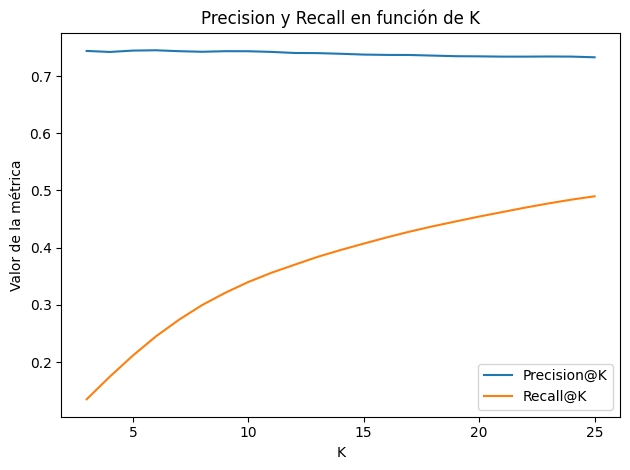

In [15]:
import matplotlib.pyplot as plt

Ks = list(range(3, 26))
precisions_k = []
recalls_k = []

for k in Ks:
    p_k, r_k = precision_recall_at_k(pred_svd, k=k, threshold=3.5)
    avg_p = sum(p_k.values()) / len(p_k)
    avg_r = sum(r_k.values()) / len(r_k)
    precisions_k.append(avg_p)
    recalls_k.append(avg_r)

plt.figure()
plt.plot(Ks, precisions_k, label='Precision@K')
plt.plot(Ks, recalls_k, label='Recall@K')
plt.xlabel('K')
plt.ylabel('Valor de la métrica')
plt.title('Precision y Recall en función de K')
plt.legend()
plt.tight_layout()
plt.show()


El análisis de la curva muestra que, a medida que aumenta el número de recomendaciones ($K$):

* La **precisión** se mantiene elevada (alrededor de 0.72–0.75) incluso al extender el top-$K$, lo que indica que la mayoría de las cervezas sugeridas siguen siendo valoradas positivamente por los usuarios.
* El **recall** crece de forma sostenida (de ≈0.13 a ≈0.49) conforme se amplía el listado, lo que significa que con más recomendaciones se cubre un porcentaje mayor de las preferencias reales de los usuarios.

En consecuencia, si se desea maximizar la confianza en cada recomendación (poca “basura”), conviene mantener $K$ reducido; en cambio, para capturar un abanico más amplio de gustos (mayor cobertura), es necesario aumentar $K$, asumiendo una ligera caída en precisión.


**2.4.5**

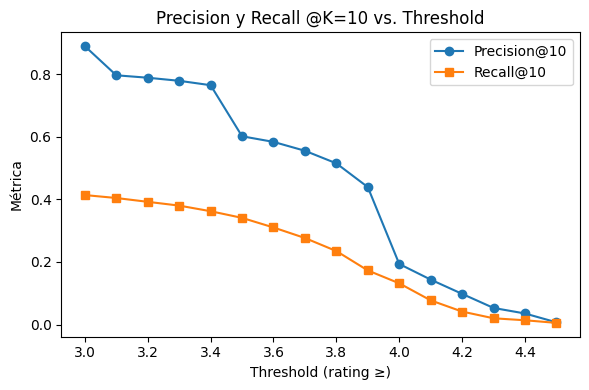

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de umbrales a evaluar
thresholds = np.arange(3.0, 4.6, 0.1)
K = 10

precisions_thr = []
recalls_thr = []

for thr in thresholds:
    p_dict, r_dict = precision_recall_at_k(pred_svd, k=K, threshold=thr)
    # Promedio sobre usuarios
    precisions_thr.append(np.mean(list(p_dict.values())))
    recalls_thr.append(np.mean(list(r_dict.values())))

plt.figure(figsize=(6,4))
plt.plot(thresholds, precisions_thr, marker='o', label=f'Precision@{K}')
plt.plot(thresholds, recalls_thr,  marker='s', label=f'Recall@{K}')
plt.xlabel('Threshold (rating ≥)')
plt.ylabel('Métrica')
plt.title(f'Precision y Recall @K={K} vs. Threshold')
plt.legend()
plt.tight_layout()
plt.show()

En este gráfico se aprecia con claridad el **trade-off** al variar el umbral de relevancia para $K=10$:

* **Umbrales bajos (3.0–3.4)**

  * La **precisión** se mantiene muy alta, descendiendo solo de \~0.92 a \~0.75.
  * El **recall** cae ligeramente, de \~0.41 a \~0.36, ya que casi todas las cervezas valoradas como “relevantes” siguen incluyéndose en el top-10.

* **Umbrales medios (3.5–4.0)**

  * La **precisión** desciende de forma más pronunciada (≈0.75 → 0.45) al elevar la exigencia de lo que se considera “buena” valoración.
  * El **recall** sufre una caída notable (≈0.33 → 0.17), pues muchos de los favoritos quedan excluidos del criterio.

* **Umbrales altos (>4.0)**

  * Tanto **precisión** como **recall** tienden a cero, porque muy pocas cervezas alcanzan notas tan elevadas para figurar en las primeras recomendaciones.

> **En resumen:** Al aumentar el umbral, se reduce drásticamente la **cobertura** de los gustos reales (recall) y, tras cierto punto, también se pierde **certeza** en cada recomendación (precision). La selección del umbral óptimo dependerá del equilibrio que se quiera lograr entre ofrecer pocas recomendaciones muy confiables o abarcar un mayor espectro de preferencias.


**2.4.6**

In [18]:
import pandas as pd

users = df['userId'].unique()
beers = df['beerId'].unique()

# 1) Generar predicciones para cada par (user, beer)
preds = [
    (u, b, algo_svd.predict(u, b).est)
    for u in users
    for b in beers
]

pred_df = pd.DataFrame(preds, columns=['userId','beerId','pred_rating'])

# 2) Pivotar a matriz usuario×producto
ratings_full = pred_df.pivot(index='userId', columns='beerId', values='pred_rating')

# 3) Comprobar que no queden NaNs y ver un fragmento
print("Shape:", ratings_full.shape)
print("¿Quedan NaNs?", ratings_full.isna().any().any())
ratings_full.iloc[:5, :5]


Shape: (706, 3747)
¿Quedan NaNs? False


beerId,5,6,7,9,10
userId,,,,,
1,3.771808,3.971141,3.720676,3.882143,3.757660
3,3.336556,3.770683,3.198733,3.574974,3.471261
4,3.803890,4.098655,3.708163,3.970690,3.815027
5,3.716707,4.018249,3.625999,3.769685,3.614239
6,3.776749,4.029568,3.609475,3.768090,3.663695


# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
